# 3주차 과제

## 1. 불균형한 레이블 데이터 세트에서 정확도를 성능 수치로 사용해서는 안되는 이유?

In [1]:
#데이터의 종류가 편향이 될 시, 예측 성능과 무관하게 높은 정확도가 도출될 수 있음 ex) 전부 0으로 예측하기

데이터의 종류가 편향이 될 시, 예측 성능과 무관하게 높은 정확도가 도출될 수 있음 ex) 전부 0으로 예측하기


## 2. 정밀도란?/정밀도가 중요 지표로 간주되는 경우  

In [ ]:
#정밀도 = positive로 한 예측 중에 실제 값이 positive인 비율 = TP / (FP+TP)
#정밀도는 실제 negative인 데이터를 postive로 잘못 예측하는것을 최소화할때 주로 사용

## 3. 재현율이란?/재현율이 중요 지표로 간주되는 경우

In [ ]:
#재현율: 실제 값이 positive인 대상 중에 예측을 positive로 한 비율 = TP / (FN+TP)
#정밀도는 실제 positive인 데이터를 negatice로 잘못 예측하는것을 최소화할때 주로 사용

## 4. 아래 임계값이 다른 두 오차 행렬이 있다. 임계값이 더 높은 오차 행렬은 무엇인가?
##    임계값이 증가할 때 정밀도/재현율은 어떻게 변하는가?
![image](https://user-images.githubusercontent.com/78632348/134499262-db2ee75d-ee29-4bb5-be65-c63914523f21.png)

In [2]:
#b의 TP와 FP값이 더 크기때문에 b의 임계값이 더 높다
#임계값이 증가하면 positive로 예측을 더 많이 하기때문에 FP값이 증가한다. 고로 분모에 FP가 있는 정밀도와 정확도는 감소한다. 
#하지만 반대로 negative로 예측하는 경우가 줄어들게 되어 FN 값이 작아지기 때문에 recall은 증가한다.


## 5. FPR이란?/임계값이 0, 1일때의 FPR?

In [ ]:
#실제값이 negative인거 중에 positive로 잘못 예측한 비율
#FPR = FP/(FP + TN) = 1- TNR(특이성)
#임계값이 0이면 TN이 0이 됨으로 FPR = 1
#임계값이 1이면 FP가 0이 됨으로 FPR = 0

## 6. 아래 결정 트리 모델에 대하여
![image](https://user-images.githubusercontent.com/78632348/134470144-d15d80ce-b472-4cf8-9dd4-5238ce08480d.png)


## 6-1. 아래 이미지는 max_depth=x로 변경하였다. x=?
![image](https://user-images.githubusercontent.com/78632348/134505196-db08ba20-484c-48b8-87b1-aa6afab96260.png)

In [ ]:
# max_depth 는 결정나무의 최대 높이를 결정해주는 hyperparameter --> x = 3

## 6.2 아래 이미지는 min_samples_split=x로 변경하였다. x=?
![image](https://user-images.githubusercontent.com/78632348/134505384-07d3298c-7e87-4a88-bfa0-8c505df17b15.png)

In [ ]:
#min_sample_split은 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 갯수 --> x = 9

## 6-3. 아래 이미지는 min_samples_leaf=x로 변경하였다. x=?
![image](https://user-images.githubusercontent.com/78632348/134505508-2db172b3-d94c-4d3d-9e0a-5b23d43ac6da.png)

In [ ]:
#MIN_SAMPLES_LEAF은 리프 노드가 될 수 있는 샘플 데이터 갯수의 최솟값 --> x = 3


## 7. 첨부된 데이터(심장병 예측 데이터)로 로지스틱 회귀를 이용해 예측 모델 생성 후 성능 수치가 좋은 적절한 임계값을 찾고 정확도/정밀도/재현율/F1 스코어/ROC AUC 값을 구하시오.
### (재현율/정밀도 곡선 그래프와, ROC 곡선 그래프도 그릴 것)



## 데이터 정보
### Heart Disease UCI
### 1. age
### 2. sex
### 3. chest pain type (4 values)
### 4. resting blood pressure
### 5. serum cholestoral in mg/dl
### 6. fasting blood sugar > 120 mg/dl
### 7. resting electrocardiographic results (values 0,1,2)
### 8. maximum heart rate achieved
### 9. exercise induced angina
### 10. oldpeak = ST depression induced by exercise relative to rest
### 11. the slope of the peak exercise ST segment
### 12. number of major vessels (0-3) colored by flourosopy
### 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
### 14. target : 1=heart disease, 0= normal

### 출처 : https://www.kaggle.com/ronitf/heart-disease-uci

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

heart_data = pd.read_csv('heart.csv')
heart_data.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [6]:
print(heart_data['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


In [8]:
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

#split
X = heart_data.iloc[:,:-1]
y= heart_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state = 156, stratify = y)

#training
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:,1]

/Users/kylie/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
confusion = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred_proba)
print(np.round(confusion,3)) #오차행렬
print(np.round(accuracy,3))  #정확도
print(np.round(precision,3))   #정밀도
print(np.round(recall,3))   #재현율
print(np.round(f1,3))   #F1 Score
print(np.round(roc_auc,3)) #ROC-AUC

[[23  5]
 [ 5 28]]
0.836
0.848
0.848
0.848
0.916


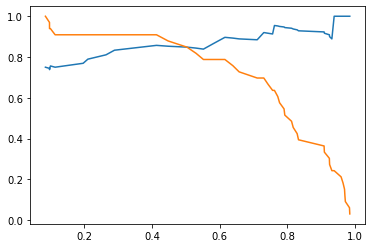

In [10]:
pred_proba_c1= lr.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

plt.figure(figsize=(6,4))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:threshold_boundary], label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
